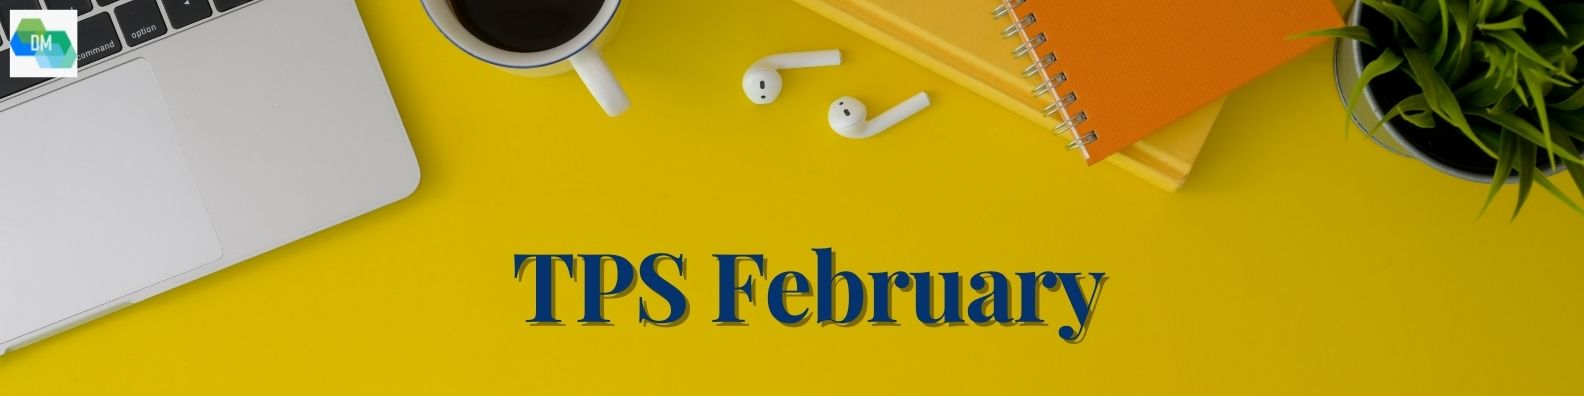

This notebook was build based on "[TPS Feb 2022 | EDA | ExtraTrees](https://www.kaggle.com/devsubhash/tps-feb-2022-eda-extratrees)"

**Observations on this TPS dataset:**
- `target` column is the target variable which consists of 10 kinds of bacteria `Streptococcus_pyogenes`,`Salmonella_enterica`,`Enterococcus_hirae`,
`Escherichia_coli`,`Campylobacter_jejuni`,`Streptococcus_pneumoniae`,
`Staphylococcus_aureus`,`Escherichia_fergusonii`,`Bacteroides_fragilis`,`Klebsiella_pneumoniae`

- `Train` dataset has `200,000` rows and `288` columns which contains`286` features, `1` target variable `target` and `1` column of `row_id`
- `Test` dataset has `100,000` rows and `287` columns which contains`286` features with`1` column of `row_id`
- No missing values in train and test dataset

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [26]:
import pandas as pd
import numpy as np

# for performace patch
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from time import time
t0 = time()
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

import joblib # For saving the trained model

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [37]:
train = "train" # make training on training data
#train = "testset" # make training of full testset
#train = "submit" # final prediction based on saved model and create submission file


<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [38]:
if train != "submit":
    df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")
#df_subm= pd.read_csv("../input/tabular-playground-series-feb-2022/sample_submission.csv")

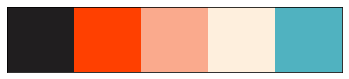

In [39]:
if train == "train":
    #Custom Color Palette 🎨
    custom_colors = ["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0"]
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=1.2)
    plt.tick_params(axis='both', labelsize=0, length = 0)

In [40]:
if train == "train":
    df_train_row_count, df_train_column_count=df_train.shape
    print('Total number of rows:', df_train_row_count)
    print('Total number of columns:', df_train_column_count)

Total number of rows: 200000
Total number of columns: 288


In [41]:
if train == "train":
    df_test_row_count, df_test_column_count=df_test.shape
    print('Total number of rows:', df_test_row_count)
    print('Total number of columns:', df_test_column_count)

Total number of rows: 100000
Total number of columns: 287


In [42]:
if train == "train":
    df_train.head()

In [43]:
if train == "train":
    df_train.describe().T

In [44]:
if train == "train":
    df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 439.5+ MB


In [45]:
df_test.describe().T

count          mean           std           min           25%  \
row_id     100000.0  2.499995e+05  28867.657797  2.000000e+05  2.249998e+05   
A0T0G0C10  100000.0  6.635157e-07      0.000075 -9.536743e-07 -9.536743e-07   
A0T0G1C9   100000.0 -2.069683e-06      0.000158 -9.536743e-06 -9.536743e-06   
A0T0G2C8   100000.0 -1.670571e-05      0.000254 -4.291534e-05 -4.291534e-05   
A0T0G3C7   100000.0 -9.132418e-06      0.000443 -1.144409e-04 -1.144409e-04   
...             ...           ...           ...           ...           ...   
A8T2G0C0   100000.0  3.918431e-04      0.001200 -4.291534e-05 -4.291534e-05   
A9T0G0C1   100000.0  6.034977e-05      0.000444 -9.536743e-06 -9.536743e-06   
A9T0G1C0   100000.0  9.343461e-05      0.000578 -9.536743e-06 -9.536743e-06   
A9T1G0C0   100000.0  1.198191e-04      0.000676 -9.536743e-06 -9.536743e-06   
A10T0G0C0  100000.0 -2.913643e-07      0.000013 -9.536743e-07 -9.536743e-07   

                    50%           75%            max  
row_id     2.499995e+05  2.749992e+05  299999.000000  
A0T0G0C10 -9.536743e-07 -9.536743e-07       0.009999  
A0T0G1C9  -9.536743e-06 -1.536743e-06       0.009990  
A0T0G2C8  -4.291534e-05 -1.291534e-05       0.009957  
A0T0G3C7  -1.144409e-04 -4.440918e-06       0.009886  
...                 ...           ...            ...  
A8T2G0C0   4.608466e-05  3.670847e-04       0.019957  
A9T0G0C1  -9.536743e-06  3.146326e-05       0.009990  
A9T0G1C0   4.632568e-07  6.046326e-05       0.009990  
A9T1G0C0   4.632568e-07  7.046326e-05       0.019990  
A10T0G0C0 -9.536743e-07 -9.536743e-07       0.000999  

[287 rows x 8 columns]

In [46]:
df_test.head()

row_id     A0T0G0C10  A0T0G1C9      A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0  200000 -9.536743e-07 -0.000002 -9.153442e-07  0.000024  0.000034 -0.000002   
1  200001 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114  0.001800 -0.000240   
2  200002  4.632568e-08  0.000003  8.465576e-08 -0.000014  0.000007 -0.000005   
3  200003 -9.536743e-07 -0.000008  8.084656e-06  0.000216  0.000420  0.000514   
4  200004 -9.536743e-07 -0.000010 -4.291534e-05 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G0C2  A8T0G1C1  A8T0G2C0  A8T1G0C1  \
0  0.000021  0.000024 -0.000009  ...  0.000039  0.000085  0.000055  0.000108   
1  0.001800 -0.000114  0.000957  ... -0.000043  0.000914 -0.000043 -0.000086   
2 -0.000004  0.000003  0.000004  ...  0.000041  0.000102  0.000084  0.000111   
3  0.000452  0.000187 -0.000005  ...  0.000069  0.000158  0.000098  0.000175   
4 -0.000200 -0.000114 -0.000043  ... -0.000043 -0.000086 -0.000043 -0.000086   

   A8T1G1C0  A8T2G0C0  A9T0G0C1  A9T0G1C0  A9T1G0C0     A10T0G0C0  
0  0.000090  0.000059  0.000010  0.000006  0.000027  4.632568e-08  
1 -0.000086 -0.000043 -0.000010 -0.000010 -0.000010 -9.536743e-07  
2  0.000117  0.000070  0.000020  0.000030  0.000021  4.632568e-08  
3  0.000217  0.000150  0.000018  0.000016  0.000051 -9.536743e-07  
4  0.000914 -0.000043 -0.000010 -0.000010  0.000990 -9.536743e-07  

[5 rows x 287 columns]

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [47]:
if train == "train":
    df_train.isna().sum()

In [48]:
df_test.isna().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A8T2G0C0     0
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
Length: 287, dtype: int64

In [49]:
if train == "train":
    print ("Unique values are:\n",df_train.nunique())

Unique values are:
 row_id       200000
A0T0G0C10        18
A0T0G1C9         23
A0T0G2C8        139
A0T0G3C7        683
              ...  
A9T0G0C1        354
A9T0G1C0        509
A9T1G0C0        515
A10T0G0C0        22
target           10
Length: 288, dtype: int64


In [50]:
if train == "train":
    target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                                 'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
    })

In [51]:
if train == "train":
    target_class

In [52]:
#if train == "train":
#     import plotly.graph_objects as go
#     fig = go.Figure()
#     fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
#                          hoverinfo ='label+percent'))
#     fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo='label', 
#                       showlegend = False,marker = dict(colors =["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0",
#                                                                 "#390099","#9e0059","#ff0054","#38B000","#ffbd00"]),
#                       title = dict(text = 'Target Distribution'))  
#     fig.show()

In [53]:
if train != "submit":
    # Dropping not necessary Id column
    df_train.drop(columns='row_id',inplace=True)
    #df_test.drop(columns='row_id',inplace=True)

In [54]:
if train != "submit":
    #Defining X and y
    X = df_train.drop(['target'], axis=1)
    y = df_train['target']

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Dataset split for prediction </centre></strong></h3>

In [55]:
if train == "train":
    # creating dataset split for prediction
    from sklearn.model_selection import train_test_split
    X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split
    #X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.8,random_state=42) # only 20% data for training

    # Checking split 
    print('X_train:', X_train.shape)
    print('y_train:', y_train.shape)
    print('X_test:', X_test.shape)
    print('y_test:', y_test.shape)

X_train: (160000, 286)
y_train: (160000,)
X_test: (40000, 286)
y_test: (40000,)


In [56]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Random Forest Classifier ✏️ </centre></strong></h3>

In [57]:
# 2. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
mrf = RandomForestClassifier(
    n_estimators=500, #25000, # number of trees
    n_jobs=-1,
    random_state=42, 
    max_depth = None, #10
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_leaf_nodes = None,
    bootstrap=True,  # bootstrap samples 
    oob_score=True, # out of bag
    warm_start=False, # For grid Search
    max_samples=None # None = All 
)


# use GridSearch for some parameter tuning on 20% subset of training data
#from sklearn.model_selection import cross_val_score, GridSearchCV
 
# parameters = {'n_estimators':list(range(500,2001,500)), 'min_samples_split':list(range(2,11,2)), "min_samples_leaf":list(range(1,11,2))}

# rf =  RandomForestClassifier(
#     n_jobs=-1,
#     random_state=42, 
#     max_depth = None, #10
#     max_leaf_nodes = None,
#     bootstrap=True,  # bootstrap samples 
#     oob_score=True, # out of bag
#     warm_start=True, # For grid Search
#     max_samples=None, # None = All 
#     verbose = 1
# )


# parameters = {'n_estimators':list(range(1500,2501,500))}

# rf =  RandomForestClassifier(
#     n_jobs=-1,
#     min_samples_split = 2,
#     min_samples_leaf = 1,
#     random_state=42, 
#     max_depth = None, #10
#     max_leaf_nodes = None,
#     bootstrap=True,  # bootstrap samples 
#     oob_score=True, # out of bag
#     warm_start=True, # For grid Search
#     max_samples=None, # None = All 
#     verbose = 1
# )

# grid = GridSearchCV(rf, parameters, cv=3)
# grid.fit(X_train, y_train)


#parameters = {'n_estimators':list(range(1500,2501,500))}

#ovasvm = OneVsRestClassifier(SVC(), n_jobs = -1)

#grid = GridSearchCV(rf, parameters, cv=3)
#grid.fit(X_train, y_train)

In [58]:
# print("Best Score:",grid.best_score_)
# print("Best parameters:",grid.best_params_)
# #print(grid.cv_results_)
# print("depth", [estimator.get_depth() for estimator in grid.best_estimator_.estimators_])

Result of:


parameters = {'n_estimators':list(range(500,2001,500)), 'min_samples_split':list(range(2,11,2)), "min_samples_leaf":list(range(1,11,2))}

 rf =  RandomForestClassifier(
     n_jobs=-1,
     random_state=42, 
     max_depth = None, #10
     max_leaf_nodes = None,
     bootstrap=True,  # bootstrap samples 
     oob_score=True, # out of bag
     warm_start=True, # For grid Search
     max_samples=None, # None = All 
     verbose = 1



Best Score: 0.9588500000000002
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}




Result of:



parameters = {'n_estimators':list(range(1500,2501,500))}

rf =  RandomForestClassifier(
    n_jobs=-1,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state=42, 
    max_depth = None, #10
    max_leaf_nodes = None,
    bootstrap=True,  # bootstrap samples 
    oob_score=True, # out of bag
    warm_start=True, # For grid Search
    max_samples=None, # None = All 
    verbose = 1
)


Best Score: 0.9495750368110484
Best parameters: {'n_estimators': 2500}


In [59]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Code based on Example from David Alvarez https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv#43645640
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 


In [ ]:
if train == "train":
    
    t0 = time() # Start time for training
    # Train the Classifier/fitting the model
#    mrf.fit(X_train, y_train)
    rf_time_train=time() - t0

    # predict the response
#    y_pred = mrf.predict(X_test)
    rf_time_predict=time() - t0 - rf_time_train
    #acc_rf = round(mrf.score(X_test,y_test) * 100, 2)


    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # evaluate accuracy
    print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print('Random Forest Classifier Training time', rf_time_train)
    print('Random Forest Classifier Prediction time', rf_time_predict)

    #Print Confusion Matrix
    #from sklearn.metrics import confusion_matrix

    #cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
    #sns.heatmap(cm, annot=True,cmap=custom_colors)
    
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import SVC

    for c in [10000]:
        ova_t0 = time() # Start time for training
        ovasvm = OneVsRestClassifier(SVC(C=c), n_jobs = -1).fit(X_train, y_train)
        ova_time_train=time() - ova_t0

        y_pred_ova = ovasvm.predict(X_test)
        ova_time_predict=time() - ova_t0 - ova_time_train

        # evaluate accuracy
        print("One vs. All SVM Accuracy:",metrics.accuracy_score(y_test, y_pred_ova), "C:", c)
        print('One vs. All SVM Training time', ova_time_train)
        print('One vs. All SVM Prediction time', ova_time_predict)

Random Forest Classifier Accuracy: 0.99475
Random Forest Classifier Training time 0.0
Random Forest Classifier Prediction time 0.0


In [26]:
# import os
# os.chdir('/kaggle/working')
# !ls '/kaggle/input/random-forest'

mrf = RandomForestClassifier(
    n_estimators=10000, # number of trees
    n_jobs=-1,
    random_state=42, 
    max_depth = None, #10
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_leaf_nodes = None,
    bootstrap=True,  # bootstrap samples 
    oob_score=True, # out of bag
    warm_start=False, # For grid Search
    max_samples=None # None = All 
)


Random Forest Classifier Accuracy: 0.99535
Training time 1233.2779049873352
Prediction time 17.552173137664795


___________________________


RF 500 trees vs OvA_SVM

RF uses all possible thread and SCM only single per OvA predictor


Random Forest Classifier Accuracy: 0.99475
Random Forest Classifier Training time 59.42121458053589
Random Forest Classifier Prediction time 0.9052524566650391
One vs. All SVM Accuracy: 0.9633
One vs. All SVM Training time 6868.747502326965
One vs. All SVM Prediction time 1084.9698605537415


RF 500 trees vs OvA_SVM with sklearnex
Random Forest Classifier Accuracy: 0.99475
Random Forest Classifier Training time 60.175848722457886
Random Forest Classifier Prediction time 0.9152729511260986
One vs. All SVM Accuracy: 0.95295
One vs. All SVM Training time 272.09899830818176
One vs. All SVM Prediction time 10.903482913970947

--> huge performance improvement for SVM, now uses also all cores and memory, no improvement for RF


SVM C 0.1
One vs. All SVM Accuracy: 0.912525
One vs. All SVM Training time 201.67318201065063
One vs. All SVM Prediction time 17.121339797973633


SVM C 5
One vs. All SVM Accuracy: 0.9677
One vs. All SVM Training time 307.69044399261475
One vs. All SVM Prediction time 7.050654888153076

SVM C 2
One vs. All SVM Accuracy: 0.9618
One vs. All SVM Training time 275.2420449256897
One vs. All SVM Prediction time 9.083268404006958

SVM C 10
One vs. All SVM Accuracy: 0.9674
One vs. All SVM Training time 325.32675409317017
One vs. All SVM Prediction time 6.328017950057983

SVM C 3.5
One vs. All SVM Accuracy: 0.96665
One vs. All SVM Training time 282.0221161842346
One vs. All SVM Prediction time 8.043567180633545


One vs. All SVM Accuracy: 0.96665 C: 7

One vs. All SVM Accuracy: 0.97035 C: 15
One vs. All SVM Training time 341.140483379364
One vs. All SVM Prediction time 5.618558406829834

One vs. All SVM Accuracy: 0.974675 C: 20
One vs. All SVM Training time 351.71434783935547
One vs. All SVM Prediction time 5.1889519691467285

One vs. All SVM Accuracy: 0.97645 C: 100
One vs. All SVM Training time 430.5154676437378
One vs. All SVM Prediction time 3.756833553314209

One vs. All SVM Accuracy: 0.975125 C: 200
One vs. All SVM Training time 455.3629403114319
One vs. All SVM Prediction time 3.254791021347046

One vs. All SVM Accuracy: 0.972225 C: 500
One vs. All SVM Training time 513.377783536911
One vs. All SVM Prediction time 2.9232218265533447

One vs. All SVM Accuracy: 0.977575 C: 1000
One vs. All SVM Training time 566.6204144954681
One vs. All SVM Prediction time 2.5607399940490723

In [27]:
if train == "submit":
    filename = "/kaggle/input/random-forest/1644525921.1991894_random_forest.joblib"

    # load already trained saved model, no need to initialize
    mrf = joblib.load(filename)
    #filename

In [28]:
if train == "testset":
    t0_full = time() # Start time for training
    
    # Train model with full dataset
    mrf.fit(X, y)
    
    # End time for training
    rf_time_train_full=time() - t0_full

    print('Training time', rf_time_train_full)
    
    # save trained model to file
    filename = str(time())+"_random_forest.joblib"
    joblib.dump(mrf, filename)


Training time 3850.133116722107


In [31]:
train = "testset"

In [32]:
if train == "testset":
    ova_t0_full = time() # Start time for training
    
    # Train model with full dataset
    ovasvm = OneVsRestClassifier(SVC()).fit(X, y)
    
    # End time for training
    ova_time_train_full=time() - ova_t0_full

    print('Training time', ova_time_train_full)
    
    # save trained model to file
    filename = str(time())+"_ova.joblib"
    joblib.dump(ovasvm, filename)


Training time 22888.09729242325


full train set rf with 10.000 trees:

Training time 1467.8956661224365


full train set rf with 25.000 trees:

Training time 3850.133116722107



OvA SMV

Training time 22888.09729242325

In [33]:
train = "submit"

In [30]:
if train == "submit":
    # Make final prediction
    y_test = mrf.predict(df_test.drop(columns='row_id',inplace=False))

In [34]:
if train == "submit":
    # Make final prediction OVA
    y_test = ovasvm.predict(df_test.drop(columns='row_id',inplace=False))

In [35]:
# encode original labels
if train == "submit":
    y_test = enc.inverse_transform(y_test)

In [36]:
if train == "submit":
    # Create submission

    # create datframe with colums name "taget"
    sub=pd.DataFrame(y_test,columns=["target"])

    # Add "row_id" from testset
    submission=pd.concat([df_test['row_id'],sub],axis=1)

    # Write submission file
    submission.to_csv("submission.csv",index=False)

One vs. All SVM: